In [379]:
import pandas as pd

file_path = '/content/drive/MyDrive/data_train.csv'

# Read the CSV file using pandas
df = pd.read_csv(file_path, index_col=0)

print(df.head())

       PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
INDEX                                                                          
0            797.0    -200.0       2.1          593.0    146.0        1212.0   
1           1282.0    -200.0      11.0         1013.0    354.0         545.0   
2            891.0    -200.0       7.6          882.0    342.0         885.0   
3           1285.0    -200.0      18.1         1243.0    481.0         599.0   
4            892.0    -200.0       7.3          869.0     71.0         953.0   

       NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
INDEX                                                          
0         72.0         984.0        494.0  10.8  49.7  0.6429  
1        141.0        1384.0       1287.0  17.4  50.6  0.9989  
2        149.0         950.0        894.0   7.8  33.9  0.3594  
3        173.0        1815.0       1582.0  26.4  41.9  1.4237  
4         77.0        1363.0        632.0  37.4  14.7  

In [380]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (6250, 12)


The provided data consists of samples for assessing air quality, intended for creating regression-based models. It includes both training data (features and labels) and test data (features only). The training data is available in a file named 'datatrain.csv', while the test data is in 'datatest.csv'. The data has different measurement of componenets in air like Benzene, NO, NO2, humididty etc. This dataset is structured to facilitate the creation and evaluation of regression models aimed at predicting CO concentrations based on various air quality indicators and environmental conditions.

The data_train.csv file has 13 columns. Column A is the index column, so it is indexed as column and is not considered under useful data. Column B is the PT08.S1(CO) metric. This is the label for our model. The range of values for this metric are in the range 1846 to -200. Columns C to M are the feature values which are metrics like NMHC(GT), C6H6(GT), T, RH, AH.

In [381]:
# Number of rows with missing data
empty_rows_count = df.isnull().all(axis=1).sum()

print("Number of empty rows:", empty_rows_count)

Number of empty rows: 77


In [382]:
# Drop rows with null values
df.dropna(inplace=True)

# Print the shape of the DataFrame after dropping null rows
print("Shape of the DataFrame after dropping null rows:", df.shape)

Shape of the DataFrame after dropping null rows: (6173, 12)


In [383]:
# Column 0 has the label PT08.S1(CO), rest of the columns are the features
start_feature_col = 1
end_feature_col = 12
label_col = 0

# Extract features
features = df.iloc[:, start_feature_col:end_feature_col]
print("Features - ")
print(features.head())

# Extract labels
labels = df.iloc[:, label_col]
print("Labels - ")
print(labels.head())

Features - 
       NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
INDEX                                                                      
0        -200.0       2.1          593.0    146.0        1212.0     72.0   
1        -200.0      11.0         1013.0    354.0         545.0    141.0   
2        -200.0       7.6          882.0    342.0         885.0    149.0   
3        -200.0      18.1         1243.0    481.0         599.0    173.0   
4        -200.0       7.3          869.0     71.0         953.0     77.0   

       PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
INDEX                                                 
0             984.0        494.0  10.8  49.7  0.6429  
1            1384.0       1287.0  17.4  50.6  0.9989  
2             950.0        894.0   7.8  33.9  0.3594  
3            1815.0       1582.0  26.4  41.9  1.4237  
4            1363.0        632.0  37.4  14.7  0.9295  
Labels - 
INDEX
0     797.0
1    1282.0
2     891.0
3    1285.0
4     

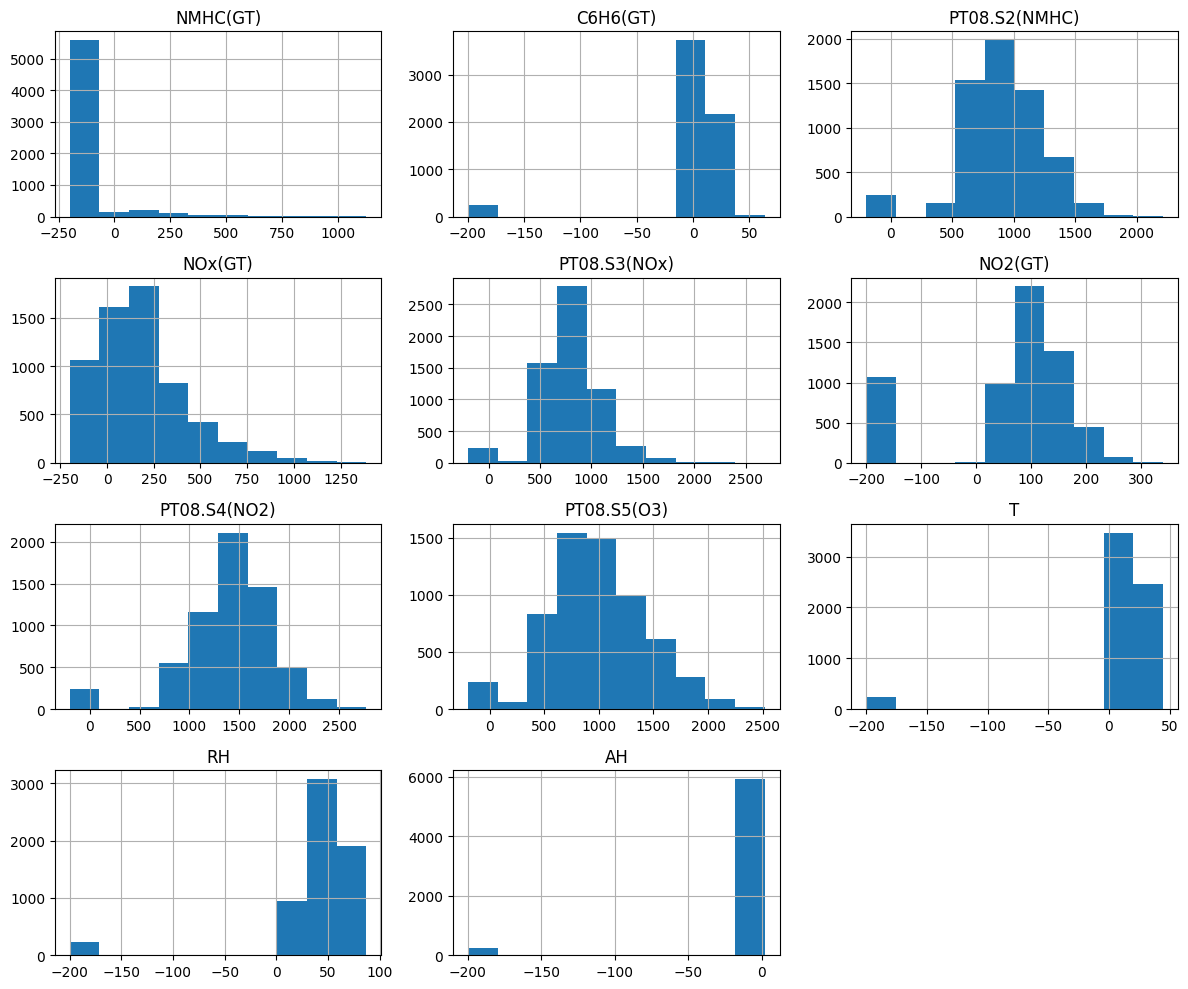

In [384]:
import matplotlib.pyplot as plt

# The histogram plot for all features
features.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [385]:
pd.options.mode.chained_assignment = None  # default='warn'
def z_score_norm (features):
  means = features.mean()
  std_devs = features.std()

  for column in features.columns:
    features.loc[:, column] = (features.loc[:, column] - means.loc[column]) / std_devs.loc[column]

  return features
features = z_score_norm(features)

In [386]:
# Remove outliers
threshold=3
outliers = (features.abs() > threshold).any(axis=1)
features = features[~outliers]
labels = labels[~outliers]
print(features.shape)
print(labels.shape)

(5654, 11)
(5654,)


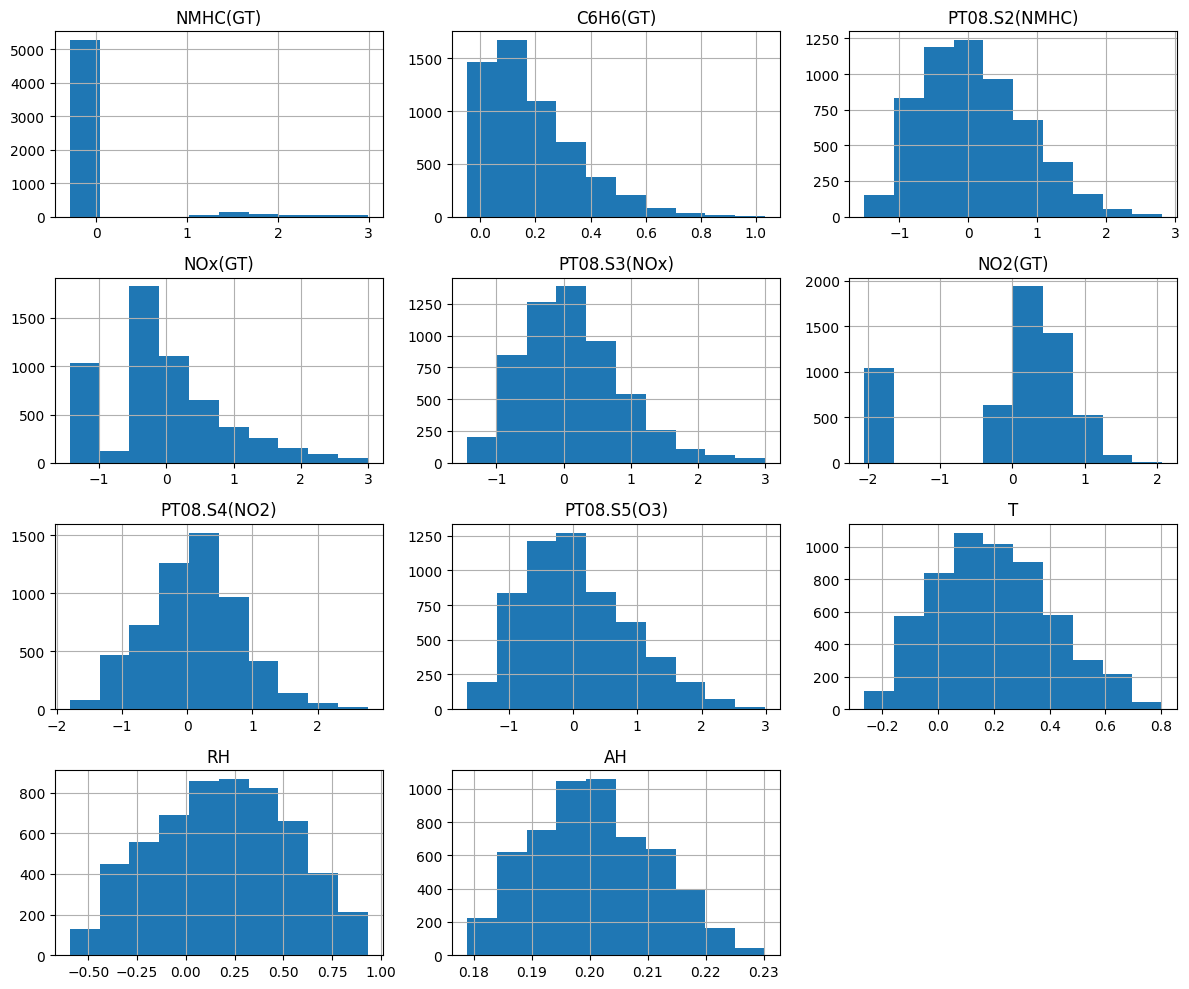

In [387]:
# Plot histograms for all features after normalization and removing ouliters
features.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

As observed from the histogram, all of the features do not have a normal distribution. Features that do not show normal distribution - C6H6(GT), NOx(GT), NO2(GT), T, RH, AH

Features C6H6(GT), PT08.S2(NMHC), PT08.S4(NO2), T, RH, AH are some of he features which showed outlier values

Normalizing features is important but not essential for both linear and logistic regression for several reasons:
1. Normalizing features helps gradient descent algorithms converge more quickly. When features are on different scales, the optimization process can take longer because the learning rate might need to be adjusted to handle the varying scales.
2. Large differences in feature scales can lead to numerical instability, especially when dealing with floating-point arithmetic in computers. Normalizing features helps mitigate this issue by scaling them to a similar range, reducing the risk of overflow or underflow during computations.
3.  the coefficients associated with each feature represent the importance of that feature in predicting the target variable. If features are on different scales, the coefficients may be biased towards features with larger scales, even if they are not necessarily more important. Normalizing features ensures that each feature contributes proportionally to the model's predictions.

Removing outliers from a dataset is crucial for enhancing model performance, maintaining statistical assumptions, improving interpretability, preventing overfitting, and boosting robustness. Outliers can distort analysis results, bias models, and hinder accurate interpretation. By eliminating outliers, models can better capture meaningful patterns and relationships in the data while reducing the risk of overfitting.


Z-Score normalization is used to scale the data. This technique scales the data to have a mean of 0 and a standard deviation of 1.

Z-Score normalization was used because it preserves distribution shape, interpreting the data becomes easier as it is spread acroos the mean which is 0, it allows for fair comparison of different variables that may have different scales and it facilitates faster convergence

After normalizing, data points with a distance of more than 3 from the mean were identified as outliers and removed from the dataset

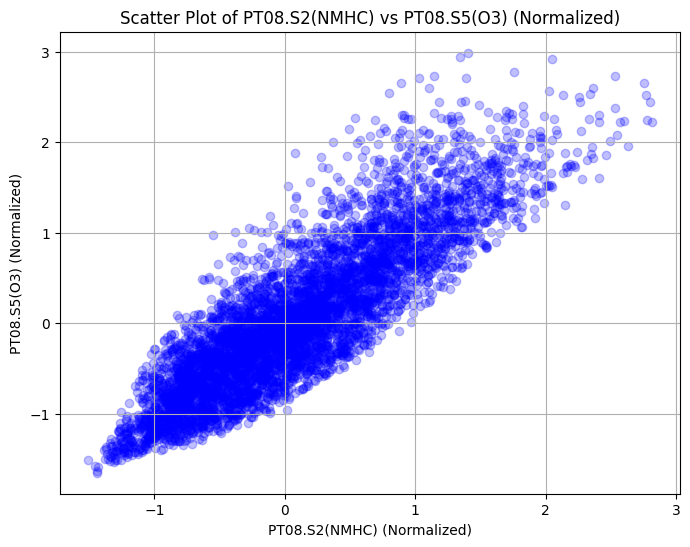

In [388]:
# Choose two features for the scatter plot
feature1 = 'PT08.S2(NMHC)'
feature2 = 'PT08.S5(O3)'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(features[feature1], features[feature2], alpha=0.25, color='blue')
plt.title(f'Scatter Plot of {feature1} vs {feature2} (Normalized)')
plt.xlabel(feature1 + ' (Normalized)')
plt.ylabel(feature2 + ' (Normalized)')
plt.grid(True)
plt.show()

There is a high correlation between he features PT08.S2(NMHC) and PT08.S5(O3).

The value of PT08.S5(O3) increases as PT08.S2(NMHC) increases.



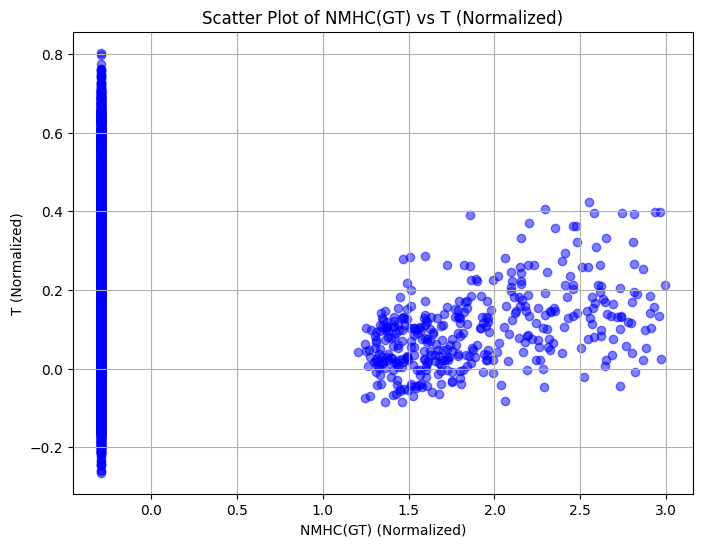

In [389]:
# Choose two features for the scatter plot
feature1 = 'NMHC(GT)'
feature2 = 'T'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(features[feature1], features[feature2], alpha=0.5, color='blue')
plt.title(f'Scatter Plot of {feature1} vs {feature2} (Normalized)')
plt.xlabel(feature1 + ' (Normalized)')
plt.ylabel(feature2 + ' (Normalized)')
plt.grid(True)
plt.show()

There is a low correlation between he features NMHC(GT) and T.

There is no pattern oberved from the scatter plot for these features.

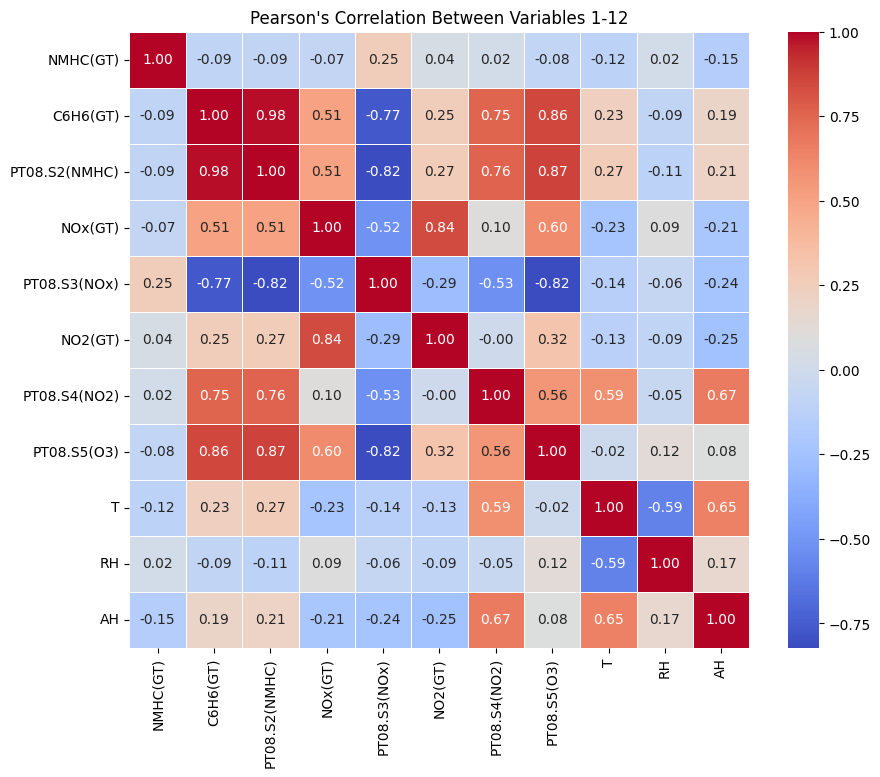

In [390]:
import seaborn as sns

# Pearson correlation matrix
correlation_matrix = features.corr()

# Correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Pearson's Correlation Between Variables 1-12")
plt.show()

1. NMHC(GT) and C6H6(GT):
There's a weak negative correlation (-0.0922) between Non-Methane Hydrocarbons (NMHC) and Benzene (C6H6) concentrations. This indicates a slight tendency for the concentrations of NMHC and C6H6 to decrease together, but the relationship is not strong.

2. C6H6(GT) and PT08.S2(NMHC):
There's a strong positive correlation (0.9839) between Benzene (C6H6) concentration and the Titania (TiO2) sensor response signal (PT08.S2) related to NMHC (Non-Methane Hydrocarbons). This suggests a high tendency for the concentration of Benzene and the sensor response related to NMHC to increase together.

3. NOx(GT) and PT08.S2(NMHC):
There's a moderate positive correlation (0.5087) between Nitrogen Oxides (NOx) concentration and the Titania (TiO2) sensor response signal (PT08.S2) related to NMHC (Non-Methane Hydrocarbons). This indicates a tendency for the concentration of NOx and the sensor response related to NMHC to increase together, but the relationship is not very strong.

4. NO2(GT) and NOx(GT):
There's a strong positive correlation (0.8384) between Nitrogen Dioxide (NO2) and Nitrogen Oxides (NOx) concentrations. This suggests a high tendency for the concentration of NO2 to increase with an increase in NOx concentration.

5. NO2(GT) and PT08.S4(NO2):
There's a weak negative correlation (-0.0039) between Nitrogen Dioxide (NO2) concentration and the Tin Oxide (SnO2) sensor response signal (PT08.S4) related to NO2. This suggests a slight tendency for the concentration of NO2 to decrease as the sensor response related to NO2 increases, but the relationship is very weak.

6. T, RH, and AH:
Temperature (T) shows a weak positive correlation with C6H6(GT), PT08.S2(NMHC), NO2(GT), PT08.S4(NO2), and a negative correlation with NOx(GT). Relative Humidity (RH) shows a weak negative correlation with C6H6(GT) and PT08.S2(NMHC), and a weak positive correlation with AH. Absolute Humidity (AH) shows a weak positive correlation with T, PT08.S4(NO2), and a weak negative correlation with NOx(GT) and PT08.S3(NOx).

In [391]:
# Linear Regression Implementaion
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        coef=[]
        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        coef.append(self.weights)
        coef.append(self.bias)
        return coef

    def predict(self, X, coef):
        weights = coef[0]
        bias = coef[1]
        return np.dot(X, weights) + bias

In [392]:
import random

def kfold_index (size, k, split):
  ind = []
  for i in range(k):
    # Range for random numbers
    start_range = 0
    end_range = size-1
    # Test size
    test_count = (size * split)//100
    # Train Size
    train_count = size - test_count
    generated_numbers = set()
    test_index = set()
    train_index = set()

    while len(generated_numbers) < end_range+1:
        # Generate a random number within the given range
        random_number = random.randint(start_range, end_range)

        # Check if the number is already generated, if not, add it to the set
        if random_number not in generated_numbers:
            generated_numbers.add(random_number)
            # Add to the test set
            if len(test_index) < test_count:
              test_index.add(random_number)
            # Add to the trainin set
            else:
              train_index.add(random_number)
    ind_both = []
    ind_both.append(list(train_index))
    ind_both.append(list(test_index))
    ind.append(ind_both)
  return ind

In [393]:
def calc_rmse (a,b):
  squared_errors = [(a - b) ** 2 for a, b in zip(a, b)]
  mse = sum(squared_errors) / len(squared_errors)
  rmse = mse ** 0.5
  return rmse

In [394]:
rmse_values = []
best_rmse = float('inf')

X = features.values
y = labels.values

# Initialize the model
lin_model = LinearRegression(learning_rate=0.01, n_iterations=10000)
# Get the kfold indexes
kfold_ind = kfold_index(features.shape[0], 5, 10)

for ind in kfold_ind:
    # Get the traning and test data from indexes
    X_train, X_test = X[ind[0]], X[ind[1]]
    y_train, y_test = y[ind[0]], y[ind[1]]

    # Train the model
    coef = lin_model.fit(X_train, y_train)

    # Make predictions
    predictions = lin_model.predict(X_test, coef)

    # Compute RMSE
    rmse = calc_rmse(y_test, predictions)
    # Store the coefficient for the best RMSE
    if rmse < best_rmse:
      best_rmse = rmse
      best_lin_coef = coef
    rmse_values.append(rmse)

# Report average and standard deviation of RMSE values
print(rmse_values)
average_rmse = np.mean(rmse_values)
std_dev_rmse = np.std(rmse_values)

print("Average RMSE:", average_rmse)
print("Standard Deviation of RMSE:", std_dev_rmse)
print("Coefficients of Model with least RMSE : ", best_lin_coef)

[66.68315069890257, 71.10678491682836, 69.0735785638969, 72.2614901192885, 71.28517400734165]
Average RMSE: 70.0820356612516
Standard Deviation of RMSE: 1.9908329591295093
Coefficients of Model with least RMSE :  [array([ 49.80264268, 198.61167842,  90.97419538,   1.72790143,
       -39.77687165,   4.4608523 , -19.70532663,  87.88564615,
        86.24306225,  96.12068556, 187.76380541]), 979.3385047389988]


After the 5-fold cross validation, we observe the minimum RMSE error value is 69. Across the 5 folds the avearge of RMSE was 70 with deviation of 2
There was small change in the RMSE value between the 5-folds.

Looking at the coefficients with the minimum RMSE error value, we can observe that coefficient for the feature C6H6(GT) was highest with a value of 198. This is the most informative feature. Features PT08.S2(NMHC), PT08.S5(O3), T, AH and RH also have relaively high value, indicating thy are also important features.
Features NOx(GT) and NO2(GT) have ver low value indicating they are not contributing too much towards label prediction. Positive coefficient indicates, increase in value of the feature results in increase in value of label and for negetive coefficient the label value decreases for increase in feature value.

In [395]:
# To create a Label array
# If the PT08.S1(CO) value is greater than 1000, it is set to 1, else it is set to 0

log_label_df = pd.DataFrame(columns=['PT08.S1(CO)'])

log_label_df['PT08.S1(CO)'] = labels
log_label_df['PT08.S1(CO)'] = log_label_df['PT08.S1(CO)'].apply(lambda x: 1 if x > 1000 else 0)
label_array = log_label_df['PT08.S1(CO)'].values
label_array = np.squeeze(label_array)

In [396]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
      num_samples, num_features = X.shape
      # Initialize parameters
      self.weights = np.zeros(num_features)
      self.bias = 0
      coef=[]

      # Gradient descent
      for _ in range(self.num_iterations):
          linear_model = np.dot(X, self.weights) + self.bias
          y_predicted = self.sigmoid(linear_model)

          # Compute gradients
          dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
          db = (1 / num_samples) * np.sum(y_predicted - y)

          # Update parameters
          self.weights -= self.learning_rate * dw
          self.bias -= self.learning_rate * db

      coef.append(self.weights)
      coef.append(self.bias)
      return coef

    def predict(self, X, coef):
        weights = coef[0]
        bias = coef[1]
        linear_model = np.dot(X, weights) + bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

In [397]:
# Class to calculate metrics to measure lof=gistic regression outputs
class calc_logistic:
  def __init__(self, y_p, y_t):
    self.y_t = y_t
    self.y_p = y_p
    self.tp = 0
    self.tn = 0
    self.fp = 0
    self.fn = 0
    for i in range(len(y_t)):
      if y_t[i]==1:
        if y_p[i]==1:
          self.tp+=1
        else:
          self.fn+=1
      if y_t[i]==0:
        if y_p[i]==0:
          self.tn+=1
        else:
          self.fp+=1
  def accuracy(self):
    return (self.tp + self.tn)/(self.tp + self.tn + self.fp + self.fn)
  def precision(self):
    return self.tp/(self.tp + self.fp)
  def recall(self):
    return self.tp/(self.tp + self.fn)
  def f1(self):
    return 2 * (self.precision()*self.recall())/(self.precision()+self.precision())
  def tpr(self):
    return self.tp / (self.tp + self.fn)
  def fpr(self):
    return self.fp / (self.fp + self.tn)

In [398]:
from sklearn.metrics import roc_curve, auc

X = features.values
y = label_array

accuracies = []
precisions = []
recalls = []
f1_scores = []
fprs = []
tprs = []
aucs = []
min_f1 = float('inf')
roc_curves = []
auc_values = []

# Initialize KFold
kfold_ind = kfold_index(features.shape[0], 5, 20)

# Initialize logistic regression model
log_model = LogisticRegression(learning_rate=0.02, num_iterations=10000)

# 5-fold cross-validation
for ind in kfold_ind:
    X_train, X_val = X[ind[0]], X[ind[1]]
    y_train, y_val = y[ind[0]], y[ind[1]]

    # Model training
    coef = log_model.fit(X_train, y_train)

    # Making predictions on the validation set
    y_pred = log_model.predict(X_val, coef)

    # Initialize calculations class
    calc_log = calc_logistic(y_pred, y_val)
    # Calculate evaluation metrics
    accuracy = calc_log.accuracy()
    precision = calc_log.precision()
    recall = calc_log.recall()
    f1 = calc_log.f1()

    # Store the coefficients for the model with best F1 score
    if f1 < min_f1:
      min_f1 = f1
      best_log_coef = coef

    # ROC Calculations
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)

    # Compute area under the curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Append fpr, tpr, and auc to lists
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(roc_auc)

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Compute average and standard deviation
avg_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

avg_precision = np.mean(precisions)
std_precision = np.std(precisions)

avg_recall = np.mean(recalls)
std_recall = np.std(recalls)

avg_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

avg_auc = np.mean(aucs)
std_auc = np.std(aucs)

# Print results
print("Accuray across 5 folds: ",accuracies)
print("Average Accuracy:", avg_accuracy)
print("Standard Deviation Accuracy:", std_accuracy)
print("Precision across 5 folds: ",precisions)
print("Average Precision:", avg_precision)
print("Standard Deviation Precision:", std_precision)
print("Recalls across 5 folds: ",recalls)
print("Average Recall:", avg_recall)
print("Standard Deviation Recall:", std_recall)
print("Average AUC:", avg_auc)
print("Standard Deviation AUC:", std_auc)
print("F1 scores across 5 folds: ", f1_scores)
print("Average F1 Score:", avg_f1)
print("Standard Deviation F1 Score:", std_f1)
print("Coefficents from best F1 score: ", best_log_coef)

Accuray across 5 folds:  [0.8982300884955752, 0.8955752212389381, 0.8884955752212389, 0.9061946902654867, 0.8973451327433628]
Average Accuracy: 0.8971681415929202
Standard Deviation Accuracy: 0.005663716814159297
Precision across 5 folds:  [0.9147727272727273, 0.9149855907780979, 0.911976911976912, 0.9115549215406562, 0.9152542372881356]
Average Precision: 0.9137088777713058
Standard Deviation Precision: 0.0015993211595016037
Recalls across 5 folds:  [0.9213161659513591, 0.9149855907780979, 0.9067431850789096, 0.9355783308931186, 0.9204545454545454]
Average Recall: 0.9198155636312062
Standard Deviation Recall: 0.00943759138364583
Average AUC: 0.8904120450922577
Standard Deviation AUC: 0.004928880317219793
F1 scores across 5 folds:  [0.9213161659513591, 0.9149855907780979, 0.9067431850789096, 0.9355783308931186, 0.9204545454545454]
Average F1 Score: 0.9198155636312062
Standard Deviation F1 Score: 0.00943759138364583
Coefficents from best F1 score:  [array([ 1.33757468,  0.62694434,  1.9

There is not much difference between the outputs of each folds. The standard deviation values are very less

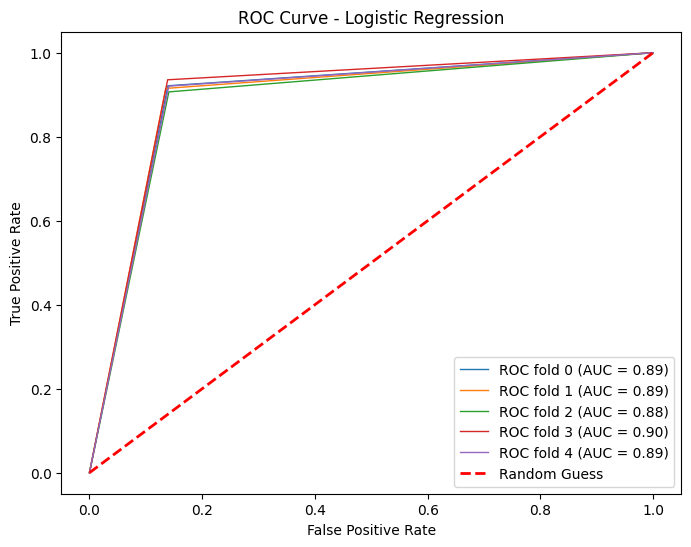

In [399]:
# Plot ROC curve for each fold
plt.figure(figsize=(8, 6))
for i in range(len(fprs)):
    plt.plot(fprs[i], tprs[i], lw=1, label='ROC fold %d (AUC = %0.2f)' % (i, aucs[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [400]:
# Logistic model implementation from sklearn library

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

X = features.values
y = label_array

# Initialize logistic regression model
model = LogisticRegression()

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
aucs = []
fprs = []
tprs = []

# Iterate over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] # Split data into train and test sets
    y_train, y_test = y[train_index], y[test_index]

    # Fit logistic regression model
    model.fit(X_train, y_train)

    # Predict probabilities for the test set
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Compute area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(roc_auc)

    # Calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)

    # Calculate recall
    recall = recall_score(y_test, y_pred)
    recalls.append(recall)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Compute average and standard deviation of metrics
avg_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
avg_precision = np.mean(precisions)
std_precision = np.std(precisions)
avg_recall = np.mean(recalls)
std_recall = np.std(recalls)
avg_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
avg_auc = np.mean(aucs)
std_auc = np.std(aucs)

# Print the results
print("Average Accuracy:", avg_accuracy)
print("Standard Deviation Accuracy:", std_accuracy)
print("Average Precision:", avg_precision)
print("Standard Deviation Precision:", std_precision)
print("Average Recall:", avg_recall)
print("Standard Deviation Recall:", std_recall)
print("Average F1 Score:", avg_f1)
print("Standard Deviation F1 Score:", std_f1)
print("Average AUC:", avg_auc)
print("Standard Deviation AUC:", std_auc)

Average Accuracy: 0.8988310133564938
Standard Deviation Accuracy: 0.011040169772771335
Average Precision: 0.9147243677231349
Standard Deviation Precision: 0.01197856305313102
Average Recall: 0.9215728274471792
Standard Deviation Recall: 0.008199515493616224
Average F1 Score: 0.9181165388999247
Standard Deviation F1 Score: 0.00937351324110602
Average AUC: 0.9660323544860999
Standard Deviation AUC: 0.0037971645242994155


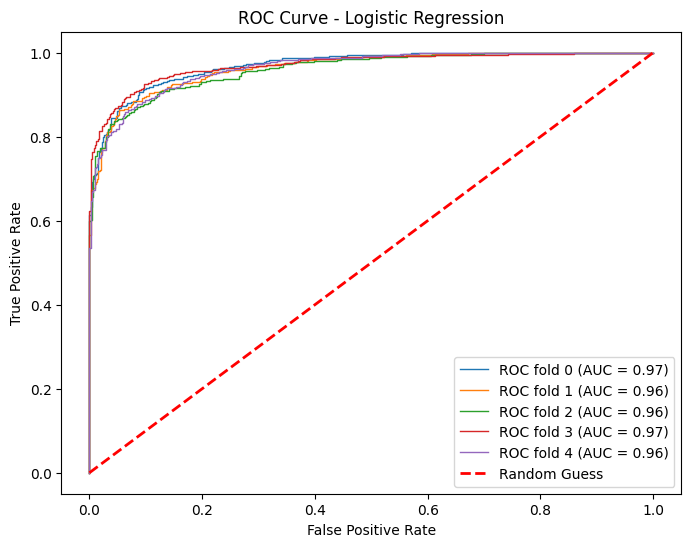

In [401]:
# Plot ROC curve for each fold
plt.figure(figsize=(8, 6))
for i in range(len(fprs)):
    plt.plot(fprs[i], tprs[i], lw=1, label='ROC fold %d (AUC = %0.2f)' % (i, aucs[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Between the sklearn and self implemented logistic regression model, the metrics accuracy, precision, recall, and F1 score were comparable with sklearn model edging ahead slightly. The sklearn model produced higher ROC AUC value around 0.96 compared to self implemented model 0.90.
The performance metrics indicate sklearn model performed better.

In [402]:
file_path = '/content/drive/MyDrive/data_test.csv'

# Read the CSV file using pandas
test_df = pd.read_csv(file_path, index_col=0)

In [403]:
# Number of rows with missing data
empty_rows_count = test_df.isnull().all(axis=1).sum()

print("Number of empty rows:", empty_rows_count)

Number of empty rows: 37


In [404]:
# Drop rows with null values
test_df.dropna(inplace=True)

# Print the shape of the DataFrame after dropping null rows
print("Shape of the DataFrame after dropping null rows:", test_df.shape)

Shape of the DataFrame after dropping null rows: (3184, 11)


In [405]:
# Normalize the test data set
scaled_test_df = z_score_norm(test_df)

In [406]:
# Input the test data to linear regression model with best coefficients
X=scaled_test_df.values

lin_pred = lin_model.predict(X, best_lin_coef)
print(lin_pred)

[1080.0019132  1264.80881322 1178.08568512 ...  845.63687483 1028.59260283
 1103.69115223]


In [411]:
# Input the test data to logisitic regression model with best coefficients
log_pred = log_model.predict(X, best_log_coef)
print(log_pred)

[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 

In [410]:
# Add the 2 predicted outputs to CSV
import csv

data = zip(lin_pred, log_pred)

csv_filename = '/content/drive/MyDrive/data_results.csv'

fieldnames = ['pred_linear', 'pred_logistic']

# Write data to CSV file
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()

    for row in data:
        writer.writerow({fieldnames[0]: row[0], fieldnames[1]: row[1]})

print(f"CSV file '{csv_filename}' has been created successfully.")


CSV file '/content/drive/MyDrive/data_results.csv' has been created successfully.
